# Handwritten Digits Classifier

## A project with an aim to practice basics of Deep Learning

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploring the Data

In [2]:
ld = load_digits()

In [3]:
ld

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
images = ld['data']
images

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
labels = ld['target']
labels

array([0, 1, 2, ..., 8, 9, 8])

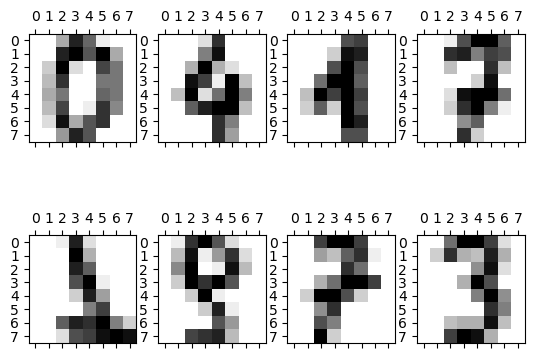

In [6]:
fig, axes = plt.subplots(2, 4)
axes[0,0].matshow(images[0].reshape(8,8), cmap='gray_r')
axes[0,1].matshow(images[100].reshape(8,8), cmap='gray_r')
axes[0,2].matshow(images[200].reshape(8,8), cmap='gray_r')
axes[0,3].matshow(images[300].reshape(8,8), cmap='gray_r')

axes[1,0].matshow(images[1000].reshape(8,8), cmap='gray_r')
axes[1,1].matshow(images[1100].reshape(8,8), cmap='gray_r')
axes[1,2].matshow(images[1200].reshape(8,8), cmap='gray_r')
axes[1,3].matshow(images[1300].reshape(8,8), cmap='gray_r')

plt.show()

## KNN model

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
images_df = pd.DataFrame(images)
labels_df = pd.DataFrame(labels)
train_X, test_X, train_y, test_y = train_test_split(images_df, labels, test_size=0.2, random_state=1)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def train(X, y, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    return knn

def test(model, X, y):
    cv = cross_val_score(model, X, y, cv=4)
    score = np.mean(cv)
    return score    

[0.9632727047760454, 0.9632764167285326, 0.9643924771096264, 0.9627233358079683, 0.9582714674585499, 0.9521516951249691]


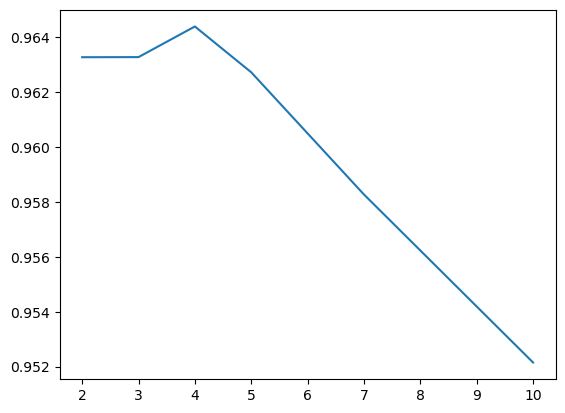

In [10]:
ks = [2, 3, 4, 5, 7, 10]
scores = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, images_df, labels, cv=4)
    score = np.mean(cv)
    scores.append(score)
print(scores)
plt.plot(ks, scores)

The best score is achieved with k of neighbors = 4: 96,4%

There are a few downsides to using k-nearest neighbors:

* high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* no model representation to debug and explore

Let's now try a neural network with a single hidden layer.

## Neural Network with a Single Hidden Layer

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
neurons = [8, 16, 32, 64, 128]
train_scores = []
test_scores = []
from sklearn.metrics import accuracy_score

for n in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(n,),
                      activation='logistic',
                      max_iter=1500)
    nn.fit(train_X, train_y)
    train_score  = accuracy_score(train_y, nn.predict(train_X))
    test_score = accuracy_score(test_y, nn.predict(test_X))
    print(f"Neurons: {n} - train score: {round(train_score*100, 2)}%, test score: {round(test_score*100, 2)}%")
    train_scores.append(train_score)
    test_scores.append(test_score)

Neurons: 8 - train score: 99.72%, test score: 92.5%
Neurons: 16 - train score: 99.93%, test score: 97.22%
Neurons: 32 - train score: 100.0%, test score: 97.78%
Neurons: 64 - train score: 100.0%, test score: 98.06%
Neurons: 128 - train score: 100.0%, test score: 98.89%


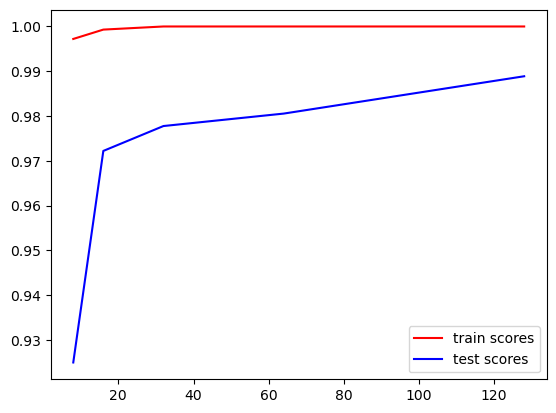

In [13]:
import matplotlib.pyplot as plt
plt.plot(neurons, train_scores, color='red', label="train scores")
plt.plot(neurons, test_scores, color='blue', label = "test scores")
plt.legend()

With 64 neurons we have the best test score, after that the model becomes overfitted.

Let´s try 2 hidden layers

In [14]:
neurons = [8, 16, 32, 64, 128]
train_scores2 = []
test_scores2 = []

for n in neurons:
    nn2 = MLPClassifier(hidden_layer_sizes=(n, n),
                      activation='logistic',
                      max_iter=1500)
    nn2.fit(train_X, train_y)
    train_score  = accuracy_score(train_y, nn2.predict(train_X))
    test_score = accuracy_score(test_y, nn2.predict(test_X))
    print(f"Neurons: {n} and {n} - train score: {round(train_score*100, 2)}%, test score: {round(test_score*100, 2)}%")
    train_scores2.append(train_score)
    test_scores2.append(test_score)

Neurons: 8 and 8 - train score: 99.3%, test score: 90.83%
Neurons: 16 and 16 - train score: 99.86%, test score: 95.28%
Neurons: 32 and 32 - train score: 100.0%, test score: 96.39%
Neurons: 64 and 64 - train score: 100.0%, test score: 98.33%
Neurons: 128 and 128 - train score: 100.0%, test score: 97.78%


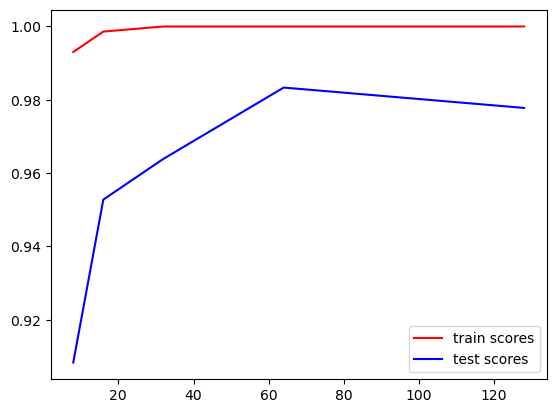

In [15]:
plt.plot(neurons, train_scores2, color='red', label="train scores")
plt.plot(neurons, test_scores2, color='blue', label = "test scores")
plt.legend()

Let´s try 3 leyers

In [16]:
neurons = [10, 64, 128, 256]
train_scores3 = []
test_scores3 = []

for n in neurons:
    nn3 = MLPClassifier(hidden_layer_sizes=(n, n, n),
                      activation='logistic',
                      max_iter=1500)
    nn3.fit(train_X, train_y)
    train_score  = accuracy_score(train_y, nn3.predict(train_X))
    test_score = accuracy_score(test_y, nn3.predict(test_X))
    print(f"Neurons: {n}, {n}, and {n} - train score: {round(train_score*100, 2)}%, test score: {round(test_score*100, 2)}%")
    train_scores3.append(train_score)
    test_scores3.append(test_score)

Neurons: 10, 10, and 10 - train score: 99.44%, test score: 89.44%
Neurons: 64, 64, and 64 - train score: 100.0%, test score: 97.22%
Neurons: 128, 128, and 128 - train score: 100.0%, test score: 97.78%
Neurons: 256, 256, and 256 - train score: 100.0%, test score: 98.33%


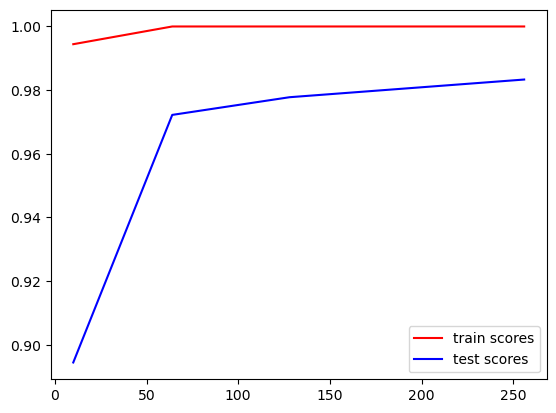

In [17]:
plt.plot(neurons, train_scores3, color='red', label="train scores")
plt.plot(neurons, test_scores3, color='blue', label = "test scores")
plt.legend()

In order to prevent overfitting it´s better to use k-fold cross validation

In [18]:
from sklearn.model_selection import cross_val_score 

def cross_validate(X, y, n, layers=1, k=4, max_iter=1500):
    if layers == 1: 
        hls = (n,)
    elif layers == 2:
        hls = (n, n)
    else:
        hls = (n, n, n)
    nn = MLPClassifier(hidden_layer_sizes=hls,
                           activation='logistic', 
                           max_iter=max_iter)
    cv = cross_val_score(nn, X, y, cv=k)
    score = np.mean(cv)
    print(f"For model with hidden layers {hls} and k-folds = {k}, score = {round(score*100, 2)}%")
    return score

In [19]:
cross_validate(images, labels, 8)

For model with hidden layers (8,) and k-folds = 4, score = 89.04%


0.8903860430586489

In [20]:
neurons = [8, 16, 32, 64, 128]

cv_scores1 = []

for n in neurons:
    cv_score = cross_validate(images, labels, n, max_iter=1500)
    cv_scores1.append(cv_score)
print(cv_scores1)

For model with hidden layers (8,) and k-folds = 4, score = 87.87%
For model with hidden layers (16,) and k-folds = 4, score = 92.93%
For model with hidden layers (32,) and k-folds = 4, score = 94.05%
For model with hidden layers (64,) and k-folds = 4, score = 94.44%
For model with hidden layers (128,) and k-folds = 4, score = 94.82%
[0.8786797822321207, 0.9293145261073992, 0.9404540955209106, 0.9443553575847563, 0.9482430091561495]


In [21]:
neurons = [8, 16, 32, 64, 128]

cv_scores2 = []

for n in neurons:
    cv_score = cross_validate(images, labels, n, layers=2, max_iter=2000)
    cv_scores2.append(cv_score)

For model with hidden layers (8, 8) and k-folds = 4, score = 86.37%
For model with hidden layers (16, 16) and k-folds = 4, score = 90.82%
For model with hidden layers (32, 32) and k-folds = 4, score = 92.6%
For model with hidden layers (64, 64) and k-folds = 4, score = 94.04%
For model with hidden layers (128, 128) and k-folds = 4, score = 94.99%


In [24]:
neurons = [8, 16, 32, 64, 128]

cv_scores3 = []

for n in neurons:
    cv_score = cross_validate(images, labels, n, layers=3, max_iter=2000)
    cv_scores3.append(cv_score)

For model with hidden layers (8, 8, 8) and k-folds = 4, score = 82.08%
For model with hidden layers (16, 16, 16) and k-folds = 4, score = 88.31%
For model with hidden layers (32, 32, 32) and k-folds = 4, score = 92.15%
For model with hidden layers (64, 64, 64) and k-folds = 4, score = 92.88%
For model with hidden layers (128, 128, 128) and k-folds = 4, score = 93.82%


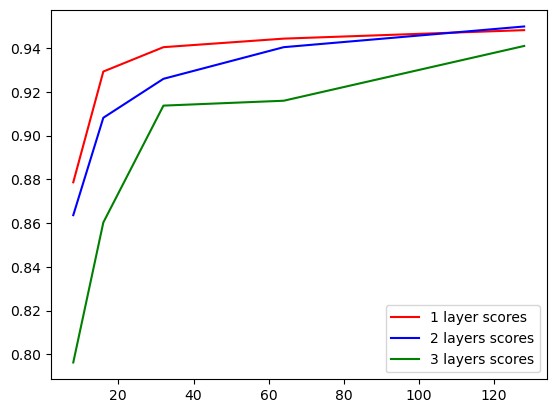

In [23]:
plt.plot(neurons, cv_scores1, label="1 layer scores", color="red")
plt.plot(neurons, cv_scores2, label="2 layers scores", color="blue")
plt.plot(neurons, cv_scores3, label="3 layers scores", color="green")
plt.legend()